In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm

from pymc.Matplot import plot as pmplot

sns.set()

In [78]:
nr_categories = 2

dick = pd.read_pickle('us_state_dict.pkl')

dick['New York']

,confirmed,deceased,inc,dead_inc,factor,dead_factor,density,gdp,pct_dead,conf_per_M,dead_per_M
2020-03-14,525.0,2.0,104.0,2.0,1.247031,NaN,1068.424744,89076,0.380952,27.005521,0.102878
2020-03-15,732.0,3.0,207.0,1.0,1.394286,1.500000,1068.424744,89076,0.409836,37.653413,0.154317
2020-03-16,967.0,10.0,235.0,7.0,1.321038,3.333333,1068.424744,89076,1.034126,49.741598,0.514391
2020-03-17,1706.0,13.0,739.0,3.0,1.764219,1.300000,1068.424744,89076,0.762016,87.755085,0.668708
2020-03-18,2495.0,16.0,789.0,3.0,1.462485,1.230769,1068.424744,89076,0.641283,128.340525,0.823025
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,393403.0,31403.0,864.0,6.0,1.002201,1.000191,1068.424744,89076,7.982400,20236.291624,1615.341687
2020-06-30,393454.0,32032.0,51.0,629.0,1.000130,1.020030,1068.424744,89076,8.141231,20238.915018,1647.696874
2020-07-01,394079.0,32043.0,625.0,11.0,1.001588,1.000343,1068.424744,89076,8.131111,20271.064448,1648.262704
2020-07-02,394954.0,32064.0,875.0,21.0,1.002220,1.000655,1068.424744,89076,8.118414,20316.073650,1649.342925


In [79]:
north = ['New York','New Jersey','Illinois','Michigan','Massachusetts','Rhode Island',
        'Delaware','Maryland','Louisiana','Pennsylvania','District of Columbia','Indiana']

last_data = []
for state in dick.keys():
    last_data.append((state,dick[state].iloc[-1]['dead_per_M']))
    
last_data = pd.DataFrame(last_data,columns=['state','dead_per_M'])
last_data['index'] = last_data['state'].apply(lambda x : 1 if x in north else 2)
last_data

,state,dead_per_M,index
0,Alabama,204.945544,2
1,Alaska,20.435912,2
2,Arizona,243.681163,2
3,Arkansas,92.464657,2
4,California,158.122109,2
5,Colorado,290.991777,2
6,Connecticut,1216.645051,2
7,Delaware,520.910168,1
8,District of Columbia,770.098531,1
9,Florida,167.507958,2


In [80]:
state_party = pd.read_csv('us_states_politics.csv',sep=';',index_col=0)
state_party

,party
state,
Alabama,Republican
Alaska,Republican
Arizona,Republican
Arkansas,Republican
California,Democratic
Colorado,Democratic
Connecticut,Democratic
Delaware,Democratic
Florida,Republican


In [81]:
last_data = pd.merge(last_data,state_party,left_on='state',right_on=state_party.index)
last_data['index2'] = last_data['party'].apply(lambda x : 1 if x == 'Republican' else 2)
last_data

,state,dead_per_M,index,party,index2
0,Alabama,204.945544,2,Republican,1
1,Alaska,20.435912,2,Republican,1
2,Arizona,243.681163,2,Republican,1
3,Arkansas,92.464657,2,Republican,1
4,California,158.122109,2,Democratic,2
5,Colorado,290.991777,2,Democratic,2
6,Connecticut,1216.645051,2,Democratic,2
7,Delaware,520.910168,1,Democratic,2
8,Florida,167.507958,2,Republican,1
9,Georgia,266.112547,2,Republican,1


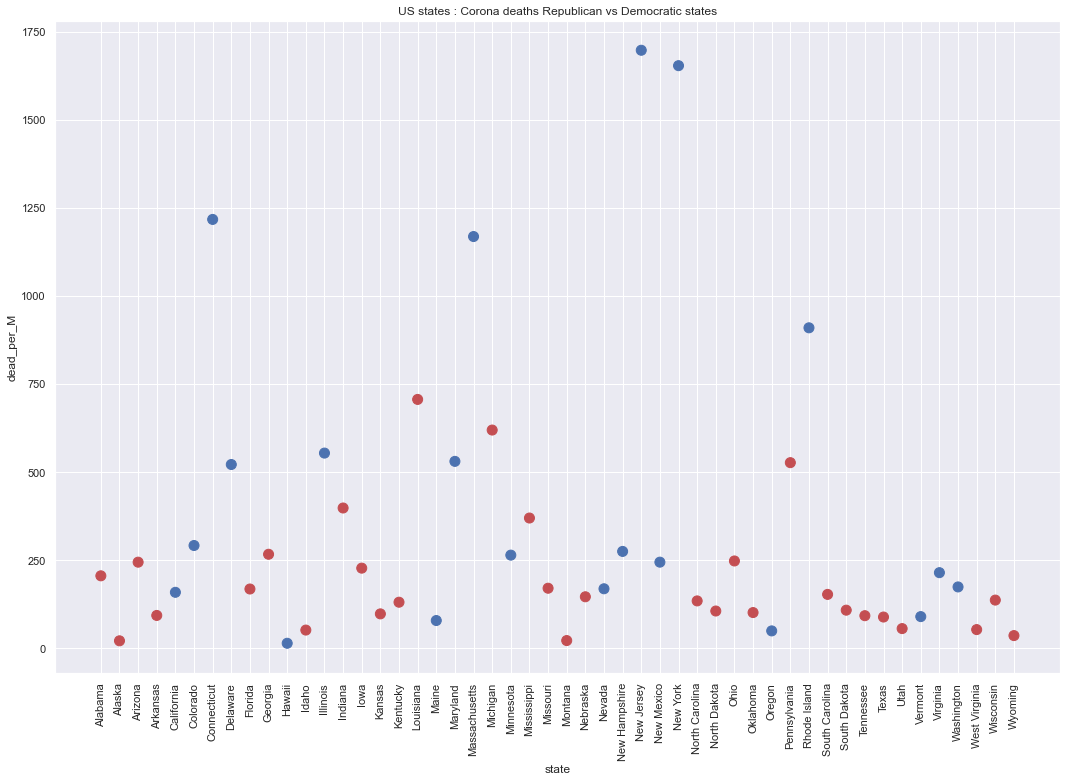

In [94]:
colors = np.where(last_data["index2"]==1,'r','b') #republican, democratic

last_data.plot(kind='scatter',x='state',y='dead_per_M',s=100,
               color=colors,figsize=(18,12),rot=90,title='US states : Corona deaths Republican vs Democratic states')
plt.savefig('us_states_political_scatter.jpg',format='jpg')

In [83]:
def regression(x,y): # x is the category index (male/female), y the outcome (height)
   
    y_sigma = pm.Uniform('y_sigma',0,100)
    
    a_mu = pm.Uniform('a_mu',100,1500)
    a_sigma = pm.Uniform('a_sigma',0,100)
    
    a = pm.Normal('a',a_mu, 1 / a_sigma ** 2,size=nr_categories) # two 'a:s', one for each category
    
    mu = a[x-1] # data category index starts at 1, so shift down to match python zero-based index
    
    y_mu = pm.Normal('y_mu', mu, 1 / y_sigma ** 2)
    
    obs = pm.Normal('obs',y_mu, 1 / y_sigma ** 2,observed=True,value=y)
    
    model = pm.Model([y_sigma,a,y_mu, mu,obs,a_mu,a_sigma])
    
    map_ = pm.MAP(model)
    map_.fit()
    
    mcmc = pm.MCMC(model)
    
    sample = mcmc.sample(100000,50000,3)
    
    y_sigma_post = mcmc.trace('y_sigma')[:]
    a_post_1 = mcmc.trace('a')[:,0]
    a_post_2 = mcmc.trace('a')[:,1]
    yt_mu_post = mcmc.trace('y_mu')[:]
    
    pmplot(y_sigma_post,'y_sigma')
    pmplot(a_post_1,'a_1')
    pmplot(a_post_2,'a_2')
    
    
    result = pd.DataFrame({'y_sigma_post' : y_sigma_post,
                          'a_post_1' : a_post_1,
                            'a_post_2' : a_post_2})
    
    return result

 [-----------------100%-----------------] 100000 of 100000 complete in 27.7 secPlotting y_sigma
Plotting a_1
Plotting a_2


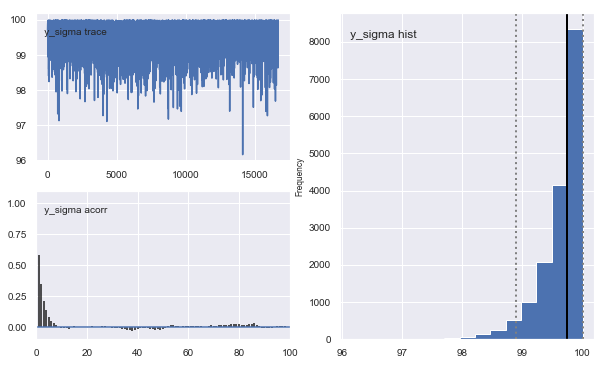

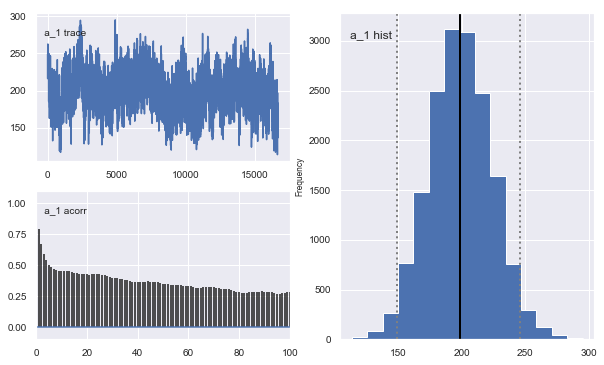

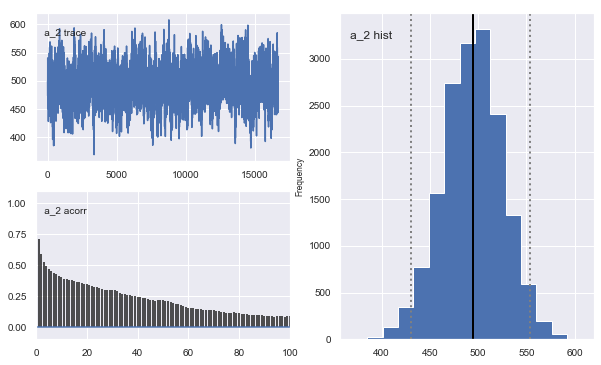

In [84]:
result = regression(last_data['index2'],last_data['dead_per_M'])



In [85]:

result['alpha_diff'] = (result.a_post_2 - result.a_post_1)

desc = result.describe().T

CI_89_low = result.quantile(0.055)
CI_89_high = result.quantile(0.945)

CI = pd.DataFrame({'5.5%': CI_89_low,
                  '94.5%':CI_89_high})


stats = desc.join(CI)

stats

,count,mean,std,min,25%,50%,75%,max,5.5%,94.5%
y_sigma_post,16667.0,99.633438,0.369174,96.160127,99.488466,99.745103,99.900244,99.999987,98.920750,99.980208
a_post_1,16667.0,199.087797,24.714356,113.953934,182.486250,198.753856,215.607325,295.009042,159.949736,238.321489
a_post_2,16667.0,493.891204,31.254306,369.231328,473.400406,494.498083,514.959839,608.168847,442.970922,542.971327
alpha_diff,16667.0,294.803407,39.862634,149.979437,268.516278,295.185404,321.424377,461.666735,229.646156,357.637863


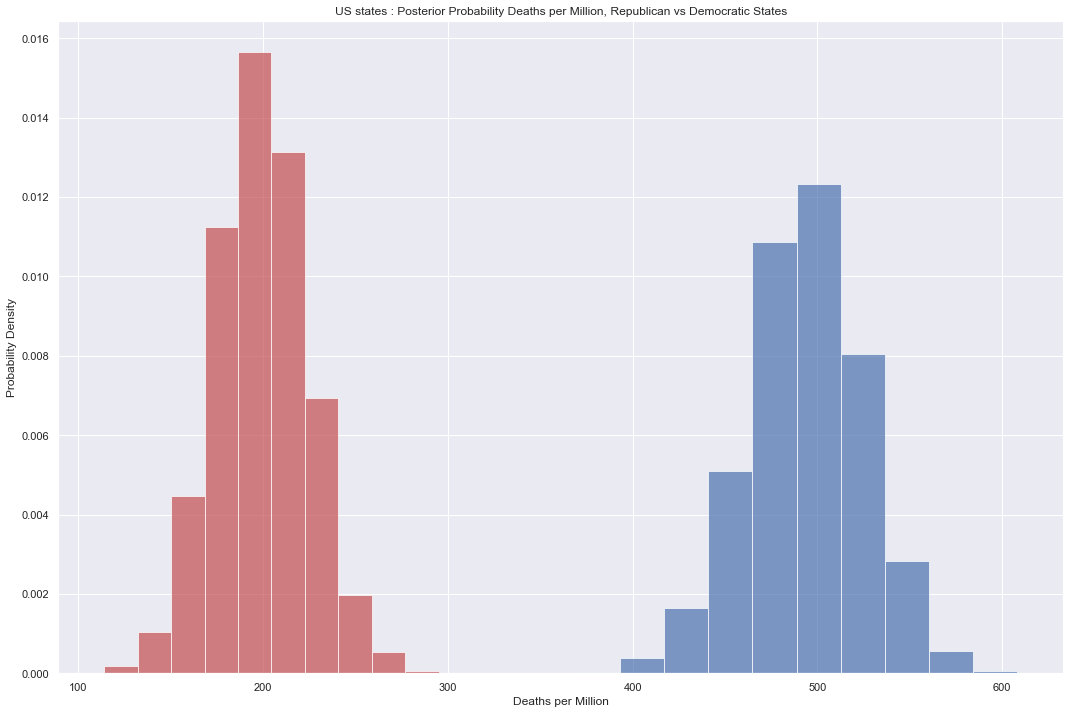

In [95]:
plt.figure(figsize=(18,12))
plt.title('US states : Posterior Probability Deaths per Million, Republican vs Democratic States')
plt.hist(result.a_post_1,color='r',alpha=0.7,density = True)
plt.hist(result.a_post_2,color='b',alpha=0.7,density = True)
plt.ylabel('Probability Density')
plt.xlabel('Deaths per Million')
plt.savefig('us_states_political_distribution.jpg',format='jpg')